In [127]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [128]:
# Charger le fichier CSV
df = pd.read_csv('Camp_Market.csv', sep=';') # Charger le fichier CSV avec le bon séparateur





In [129]:
# Informations sur les données
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [130]:
# Checking if any NaN is present in column or not
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [131]:
# Calculer la moyenne des salaires par groupe d'éducation
mean_income_by_education = df.groupby('Education')['Income'].mean()
print(mean_income_by_education)

# Remplacer les valeurs manquantes dans Income par la moyenne selon le groupe d'éducation
df['Income'] = df.apply(
    lambda row: mean_income_by_education[row['Education']] if pd.isnull(row['Income']) else row['Income'],
    axis=1
)
# Vérifier s'il reste des valeurs manquantes dans la colonne Income
df['Income'].isnull().sum()


Education
2n Cycle      47633.190000
Basic         20306.259259
Graduation    52720.373656
Master        52917.534247
PhD           56145.313929
Name: Income, dtype: float64


np.int64(0)

In [132]:
# Supprimer la ligne où le salaire est égal à 666666.0
df = df[df['Income'] != 666666.0]
# Vérifier les 10 plus gros salaires après suppression
top_10_incomes = df['Income'].sort_values(ascending=False).head(10)
print(top_10_incomes)



617     162397.0
687     160803.0
1300    157733.0
164     157243.0
1653    157146.0
2132    156924.0
655     153924.0
1898    113734.0
646     105471.0
252     102692.0
Name: Income, dtype: float64


[67 70 59 40 43 57 53 39 50 74 41 48 65 72 37 78 44 75 42 45 73 55 38 35
 61 54 51 81 49 28 56 60 47 46 69 58 36 76 66 52 64 79 33 62 71 63 68 32
 34 77 31 30 83 80 29 84]


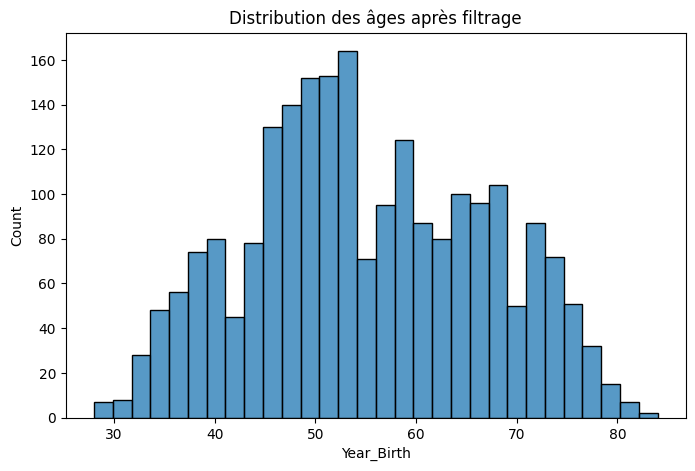

In [133]:
# Calculer les âges à partir de l'année de naissance
ages = 2024 - df['Year_Birth']

# Filtrer les âges indésirables (124, 125, 131 ans)
data_filtered = df[~ages.isin([124, 125, 131])]

# Recalculer les âges après filtrage
ages_filtered = 2024 - data_filtered['Year_Birth']

# Vérifier si les âges indésirables sont bien enlevés
print(ages_filtered.unique())  # Ceci devrait exclure 124, 125 et 131

# Visualiser la distribution des âges après filtrage
plt.figure(figsize=(8,5))
sns.histplot(ages_filtered, bins=30)
plt.title('Distribution des âges après filtrage')
plt.show()



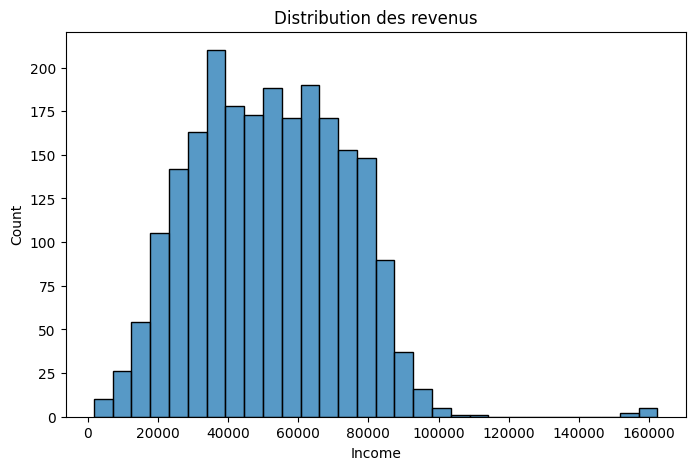

In [134]:
plt.figure(figsize=(8,5))
sns.histplot(df['Income'].dropna(), bins=30)
plt.title('Distribution des revenus')
plt.show()


['single' 'together' 'married' 'divorced' 'widow' 'alone']


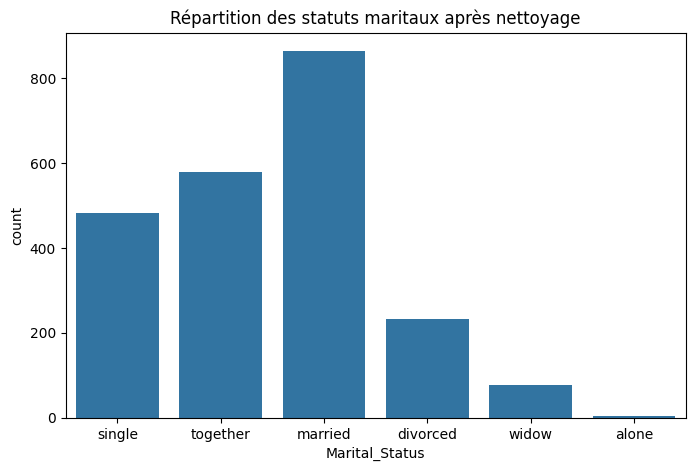

In [135]:
# Convertir toutes les valeurs en minuscules et supprimer les espaces avant/après
df['Marital_Status'] = df['Marital_Status'].str.lower().str.strip()

# Supprimer les lignes où 'Marital_Status' est égal à 'absurd'
df = df[df['Marital_Status'] != 'absurd']

# Remplacer 'yolo' par 'single'
df['Marital_Status'] = df['Marital_Status'].replace('yolo', 'single')

# Vérifier les valeurs uniques après modification
print(df['Marital_Status'].unique())

# Bar chart pour la répartition des statuts maritaux après modification
plt.figure(figsize=(8,5))
sns.countplot(x='Marital_Status', data=df)
plt.title('Répartition des statuts maritaux après nettoyage')
plt.show()



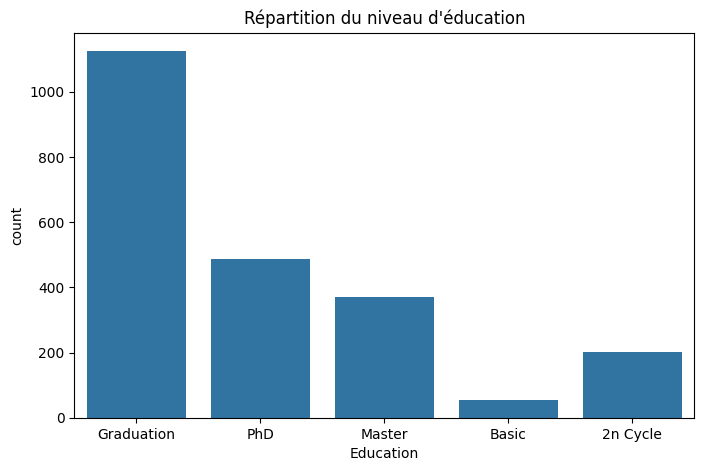

In [136]:
plt.figure(figsize=(8,5))
sns.countplot(x='Education', data=df)
plt.title('Répartition du niveau d\'éducation')
plt.show()


ANALYSE DES COMPORTEMENTS D'ACHAT

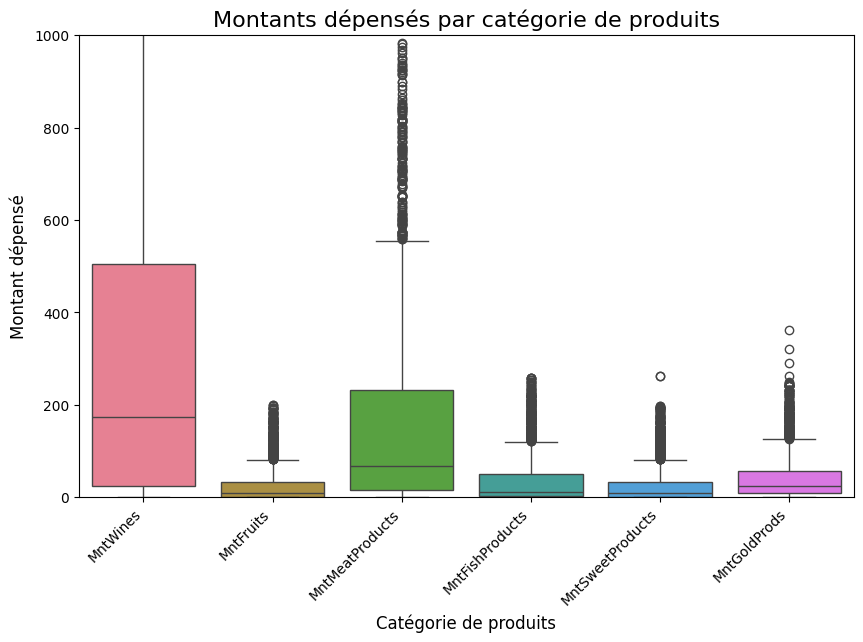

In [137]:
# Définir une palette de couleurs pour chaque catégorie
palette = sns.color_palette("husl", 6)

# Créer le boxplot avec une palette colorée et des étiquettes plus lisibles
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_filtered[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']], 
            palette=palette, showfliers=True)

# Ajuster l'échelle pour rendre le graphique plus lisible
plt.ylim(0, 1000)  # Limite l'échelle pour éviter les valeurs extrêmes trop élevées

# Ajouter un titre et ajuster les étiquettes
plt.title('Montants dépensés par catégorie de produits', fontsize=16)
plt.ylabel('Montant dépensé', fontsize=12)
plt.xlabel('Catégorie de produits', fontsize=12)

# Tourner les étiquettes de l'axe des x pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Afficher le graphique
plt.show()



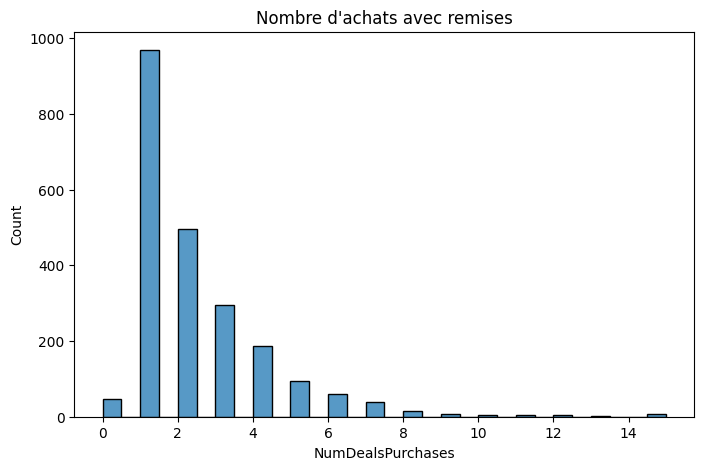

In [138]:
plt.figure(figsize=(8,5))
sns.histplot(df['NumDealsPurchases'], bins=30)
plt.title('Nombre d\'achats avec remises')
plt.show()


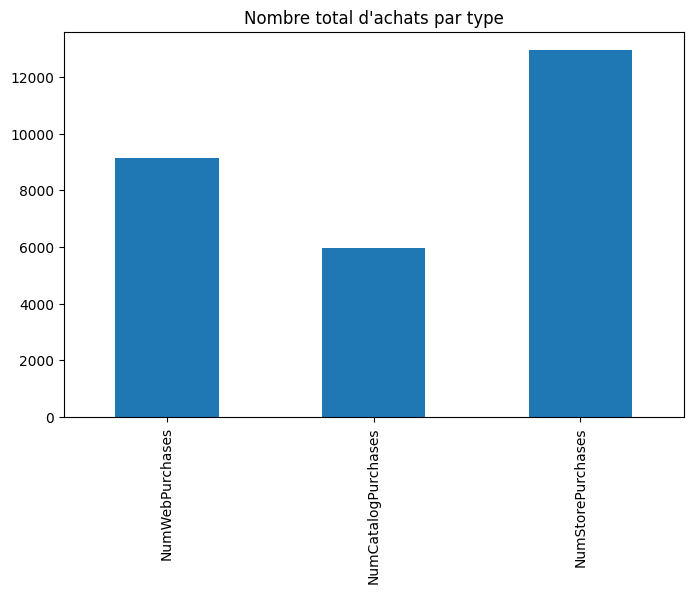

In [139]:
types_achats = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df[types_achats].sum().plot(kind='bar', figsize=(8,5))
plt.title('Nombre total d\'achats par type')
plt.show()


ANALYSE DES RÉPONSES AUX CAMPAGNES MARKETING ET ENGAGEMENT

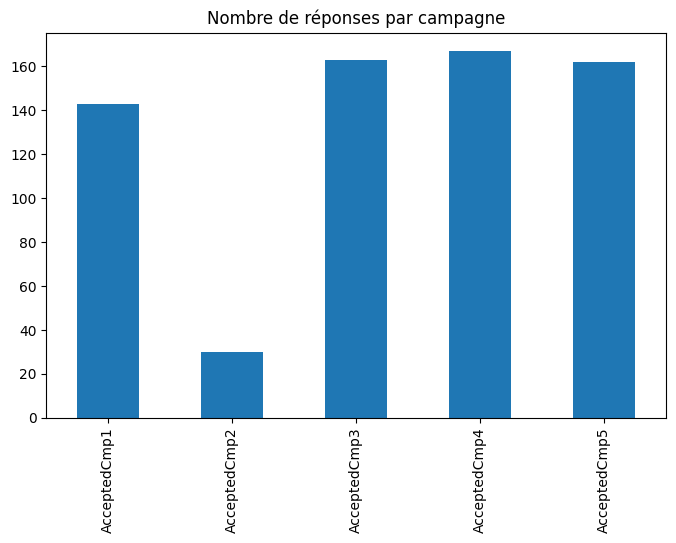

In [140]:
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df[campaigns].sum().plot(kind='bar', figsize=(8,5))
plt.title('Nombre de réponses par campagne')
plt.show()


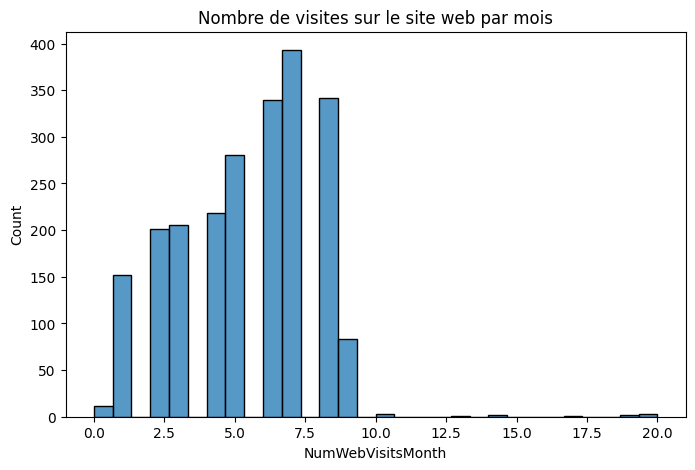

In [141]:
plt.figure(figsize=(8,5))
sns.histplot(df['NumWebVisitsMonth'], bins=30)
plt.title('Nombre de visites sur le site web par mois')
plt.show()


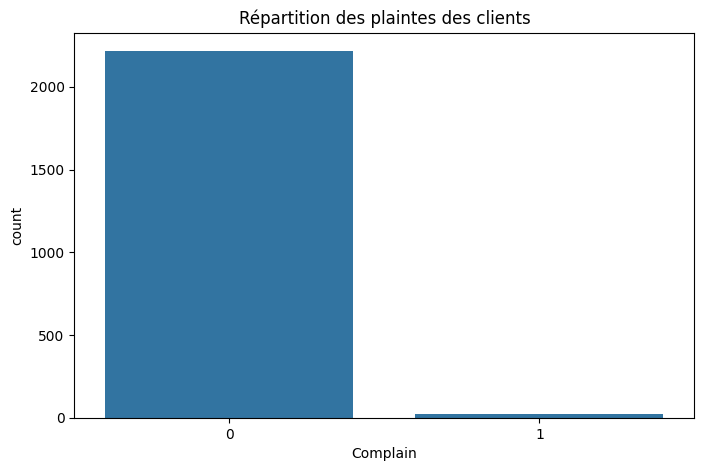

In [142]:
plt.figure(figsize=(8,5))
sns.countplot(x='Complain', data=df)
plt.title('Répartition des plaintes des clients')
plt.show()


ANALYSE DES CORRÉLATIONS ENTRE VARIABLES

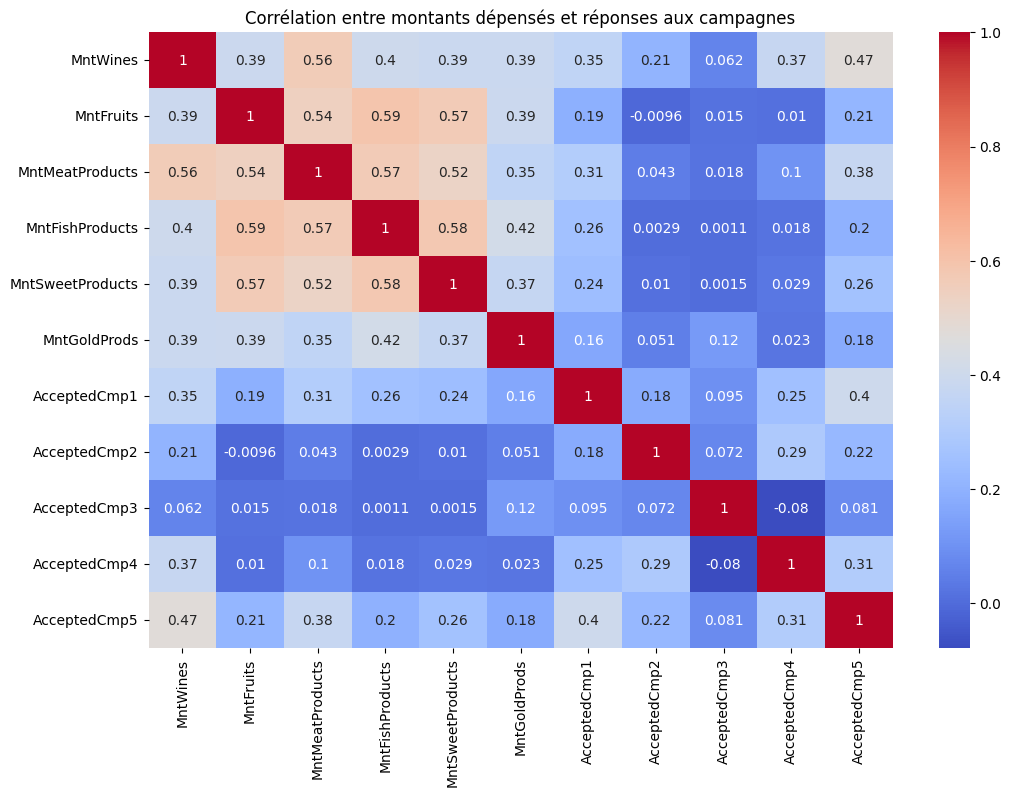

In [143]:
plt.figure(figsize=(12,8))
corr = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'] + campaigns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Corrélation entre montants dépensés et réponses aux campagnes')
plt.show()


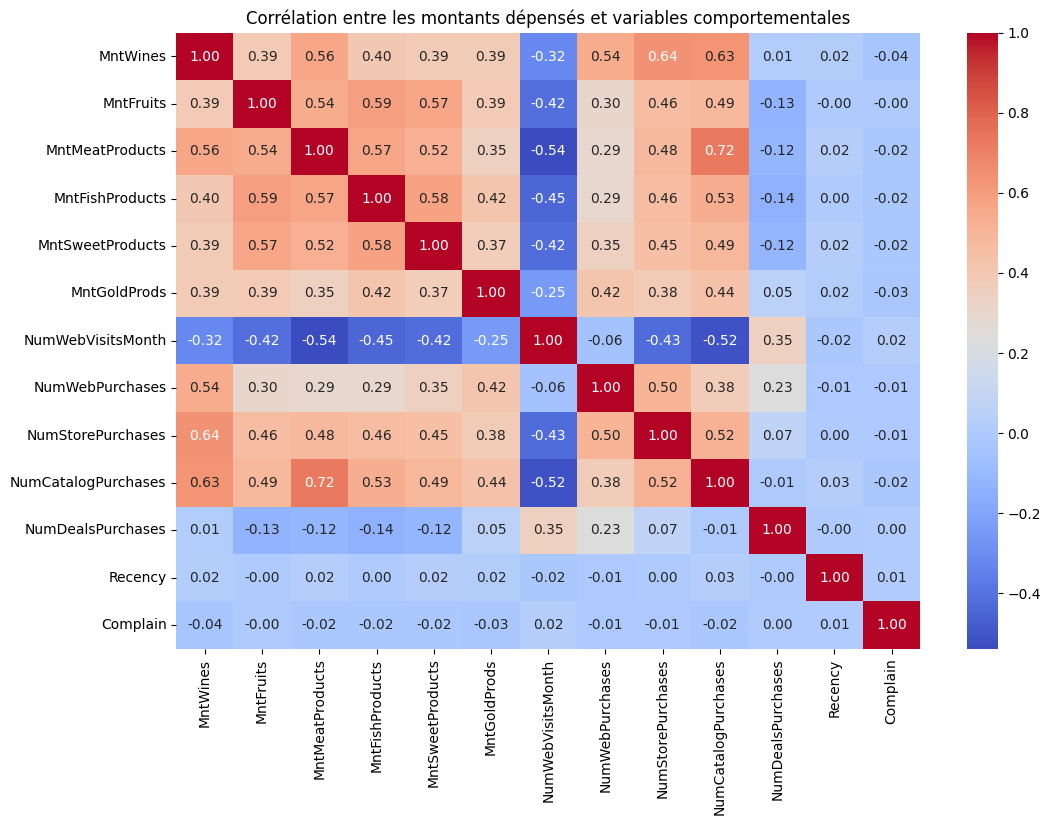

In [144]:
#Heatmap globale comprenant : NumWebVisitsMonth, NumWebPurchases, NumStorePurchases, NumCatalogPurchases, NumDealsPurchases, Recency et Complain 

# Variables comportementales supplémentaires
variables = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
             'MntSweetProducts', 'MntGoldProds', 'NumWebVisitsMonth', 
             'NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases', 
             'NumDealsPurchases', 'Recency', 'Complain']

# Calculer la matrice de corrélation
corr_matrix = data_filtered[variables].corr()

# Afficher la heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Corrélation entre les montants dépensés et variables comportementales')
plt.show()


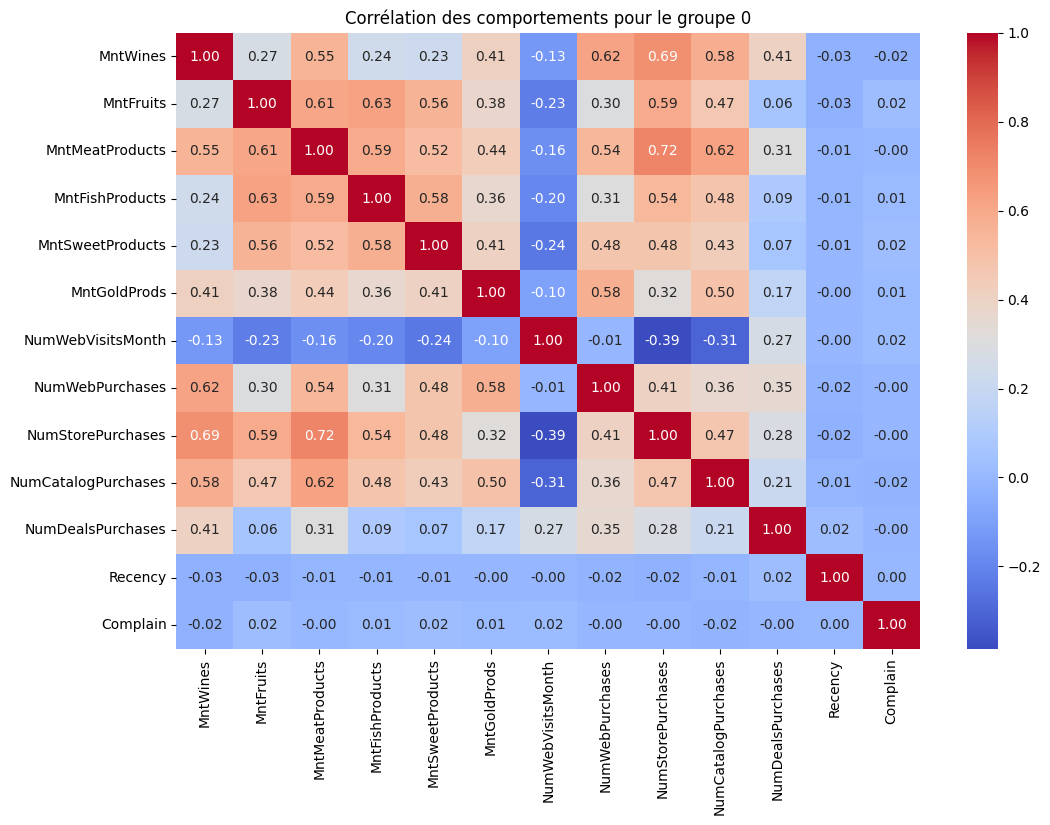

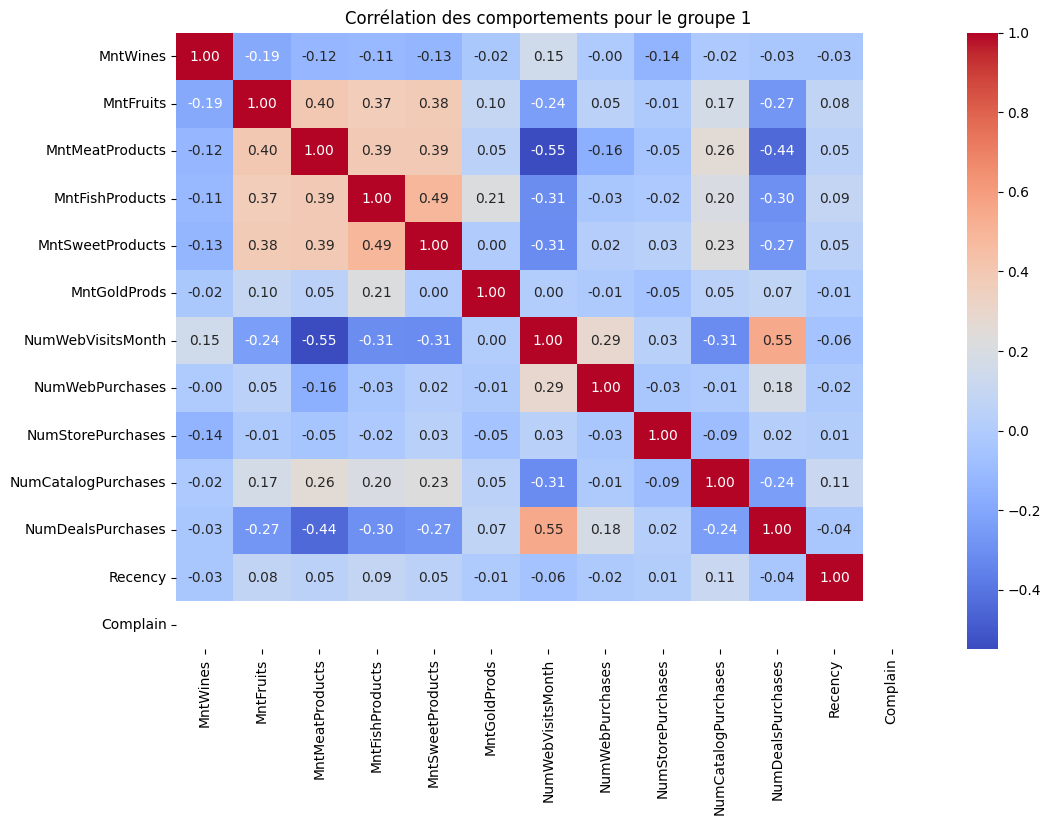

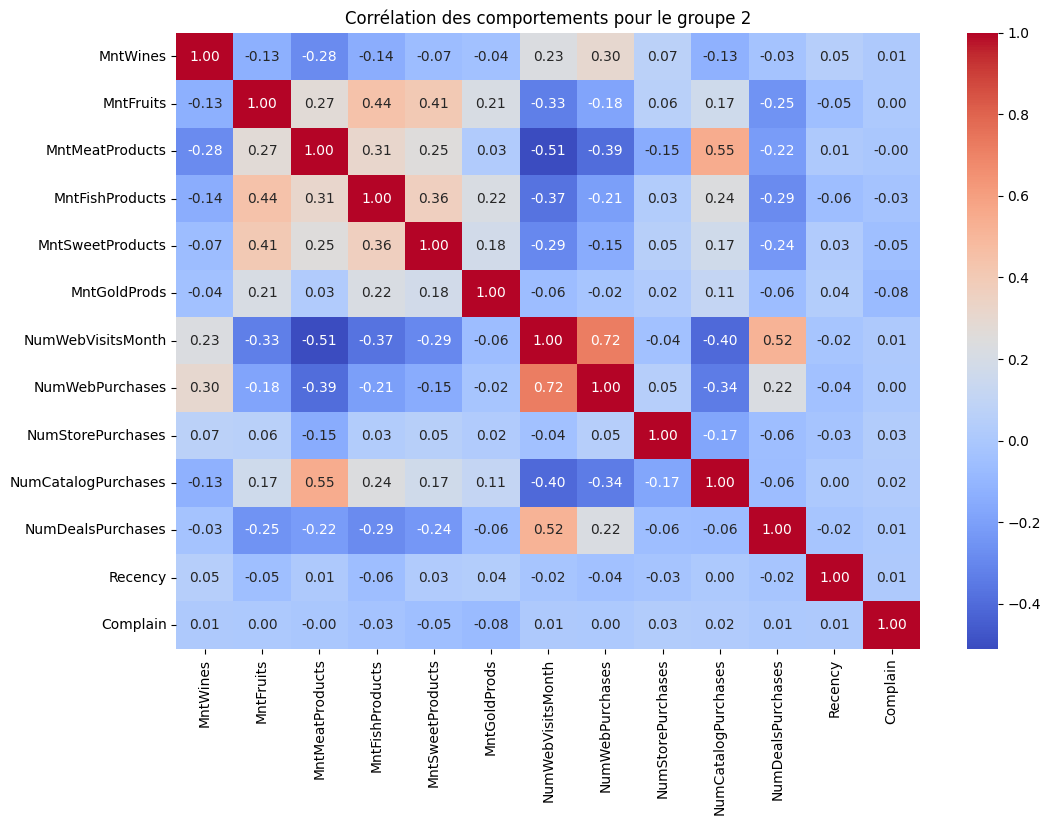

In [145]:
#Heatmaps segmentées selon les groupes de clients

from sklearn.cluster import KMeans

# Sélection des variables pour le clustering
clustering_vars = ['MntWines', 'MntFruits', 'MntMeatProducts', 'NumWebVisitsMonth', 'NumDealsPurchases', 'Recency']

# Appliquer K-Means (choisir un nombre de clusters, ici 3 pour l'exemple)
kmeans = KMeans(n_clusters=3, random_state=42)
data_filtered['Cluster'] = kmeans.fit_predict(data_filtered[clustering_vars])

# Créer une heatmap pour chaque segment
for cluster in sorted(data_filtered['Cluster'].unique()):
    plt.figure(figsize=(12,8))
    segment_data = data_filtered[data_filtered['Cluster'] == cluster]
    corr_matrix = segment_data[variables].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Corrélation des comportements pour le groupe {cluster}')
    plt.show()


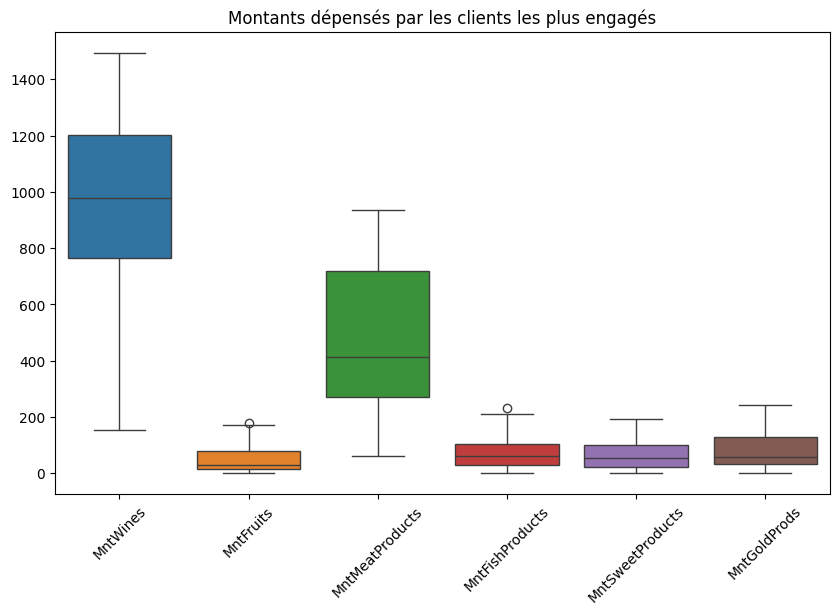

In [146]:
# Créer un score d'engagement en fonction des réponses aux campagnes
data_filtered['Engagement_Score'] = data_filtered[campaigns].sum(axis=1)

# Analyser les clients les plus engagés (par exemple, ceux avec un score >= 3)
engaged_clients = data_filtered[data_filtered['Engagement_Score'] >= 3]

# Visualiser les montants dépensés par les clients les plus engagés
plt.figure(figsize=(10,6))
sns.boxplot(data=engaged_clients[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']])
plt.title('Montants dépensés par les clients les plus engagés')
plt.xticks(rotation=45)
plt.show()
